In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

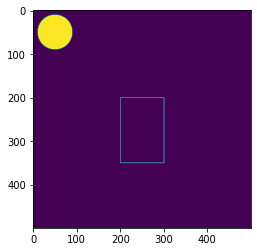

In [21]:
img=np.zeros((500,500),np.uint8)
cv2.circle(img,(50,50),40,255,-1)
cv2.rectangle(img,(200,200),(300,350),255,1)
plt.imshow(img)
# print(img)

In [34]:
# thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)[1]
cnt,hier=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# plt.imshow(cnt)
print(len(cnt[0]),len(cnt[1]))

500 224


In [32]:
cv2.moments(cnt[0])


{'m00': 15000.0,
 'm10': 3750000.0,
 'm01': 4125000.0,
 'm20': 950000000.0,
 'm11': 1031250000.0,
 'm02': 1162500000.0,
 'm30': 243750000000.0,
 'm21': 261250000000.0,
 'm12': 290625000000.0,
 'm03': 335156250000.0,
 'mu20': 12500000.0,
 'mu11': 0.0,
 'mu02': 28125000.0,
 'mu30': 0.0,
 'mu21': 0.0,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.055555555555555566,
 'nu11': 0.0,
 'nu02': 0.12500000000000003,
 'nu30': 0.0,
 'nu21': 0.0,
 'nu12': 0.0,
 'nu03': 0.0}

In [36]:
cv2.arcLength(cnt[1],True)

263.76449966430664

In [ ]:
img=cv2.imread()

21


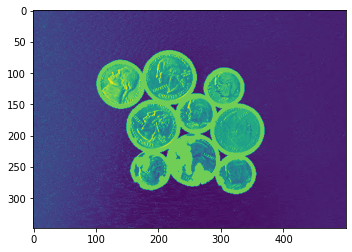

In [68]:
img=cv2.imread("CVfiles/coins.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh=cv2.threshold(img,127,255,cv2.THRESH_OTSU)[1]
erode=cv2.erode(thresh,(3,3),iterations=3)
dil=cv2.dilate(erode,(3,3),iterations=3)

cnt,hier=cv2.findContours(dil,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(len(cnt))
cv2.drawContours(img,cnt,-1,(200,255,50),5)
plt.imshow(img)

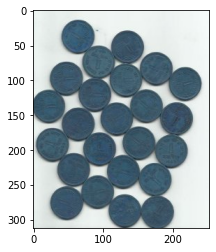

In [75]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("CVfiles/water_coins.jpg")
plt.imshow(img)

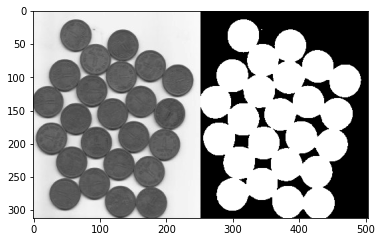

In [83]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(np.hstack([gray,thresh]),cmap="gray")

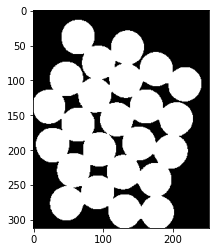

In [87]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening,cmap="gray")

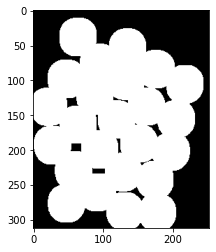

In [89]:
sure_bg = cv.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg,cmap="gray")

312


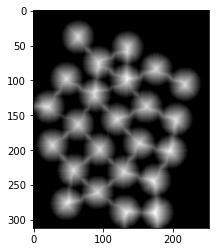

In [177]:
# np.set_printoptions(threshold=np.inf)
dist_transform = cv.distanceTransform(opening,cv.DIST_L1,5)
print(len(dist_transform))

ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(dist_transform,cmap="gray")

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   

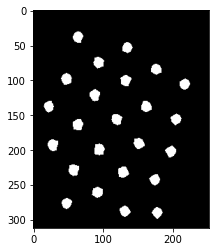

In [157]:
plt.imshow(sure_fg,cmap="gray")
# np.set_printoptions(threshold=np.inf)
print(sure_fg)
print(sure_bg)

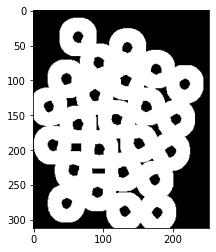

In [158]:
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown,cmap="gray")

In [171]:
# Marker labelling
# np.set_printoptions(threshold=np.inf)
ret, markers = cv.connectedComponents(sure_fg)
# print(markers)
# Add one to all labels so that sure background is not 0, but 1
mark = markers+1
# Now, mark the region of unknown with zero
print(mark)
mark[unknown==255] = 0

# plt.imshow(markers)

[[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

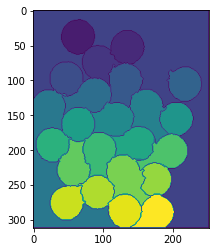

In [172]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(markers)

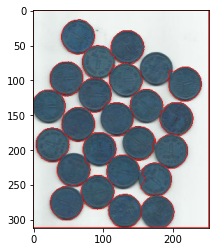

In [167]:
plt.imshow(img)